In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\19. ML Pipelines\\pima-indians-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [6]:
df.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

In [7]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Age'>

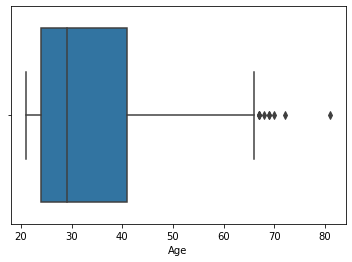

In [9]:
sns.boxplot(df.Age)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

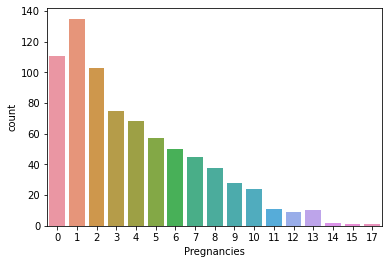

In [10]:
sns.countplot(df.Pregnancies)

<AxesSubplot:xlabel='Class', ylabel='count'>

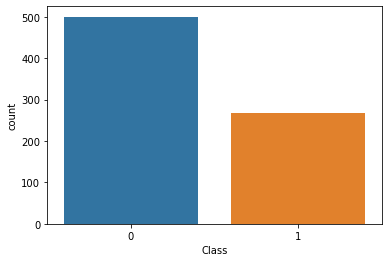

In [11]:
sns.countplot(df.Class)

<AxesSubplot:xlabel='Insulin'>

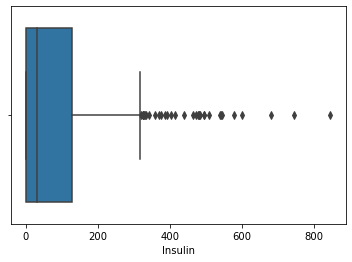

In [12]:
sns.boxplot(df.Insulin)

<AxesSubplot:xlabel='BMI'>

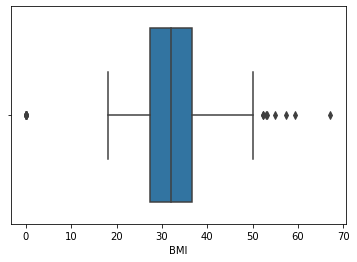

In [13]:
sns.boxplot(df.BMI)

<AxesSubplot:xlabel='Age', ylabel='BMI'>

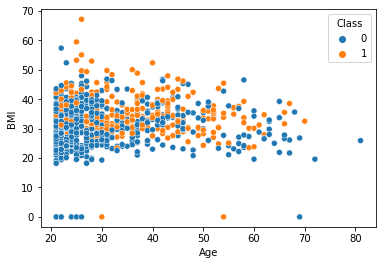

In [14]:
sns.scatterplot(x='Age',y='BMI',data=df,hue='Class')

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

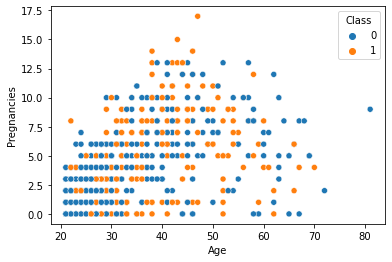

In [15]:
sns.scatterplot(x='Age',y='Pregnancies',data=df,hue='Class')

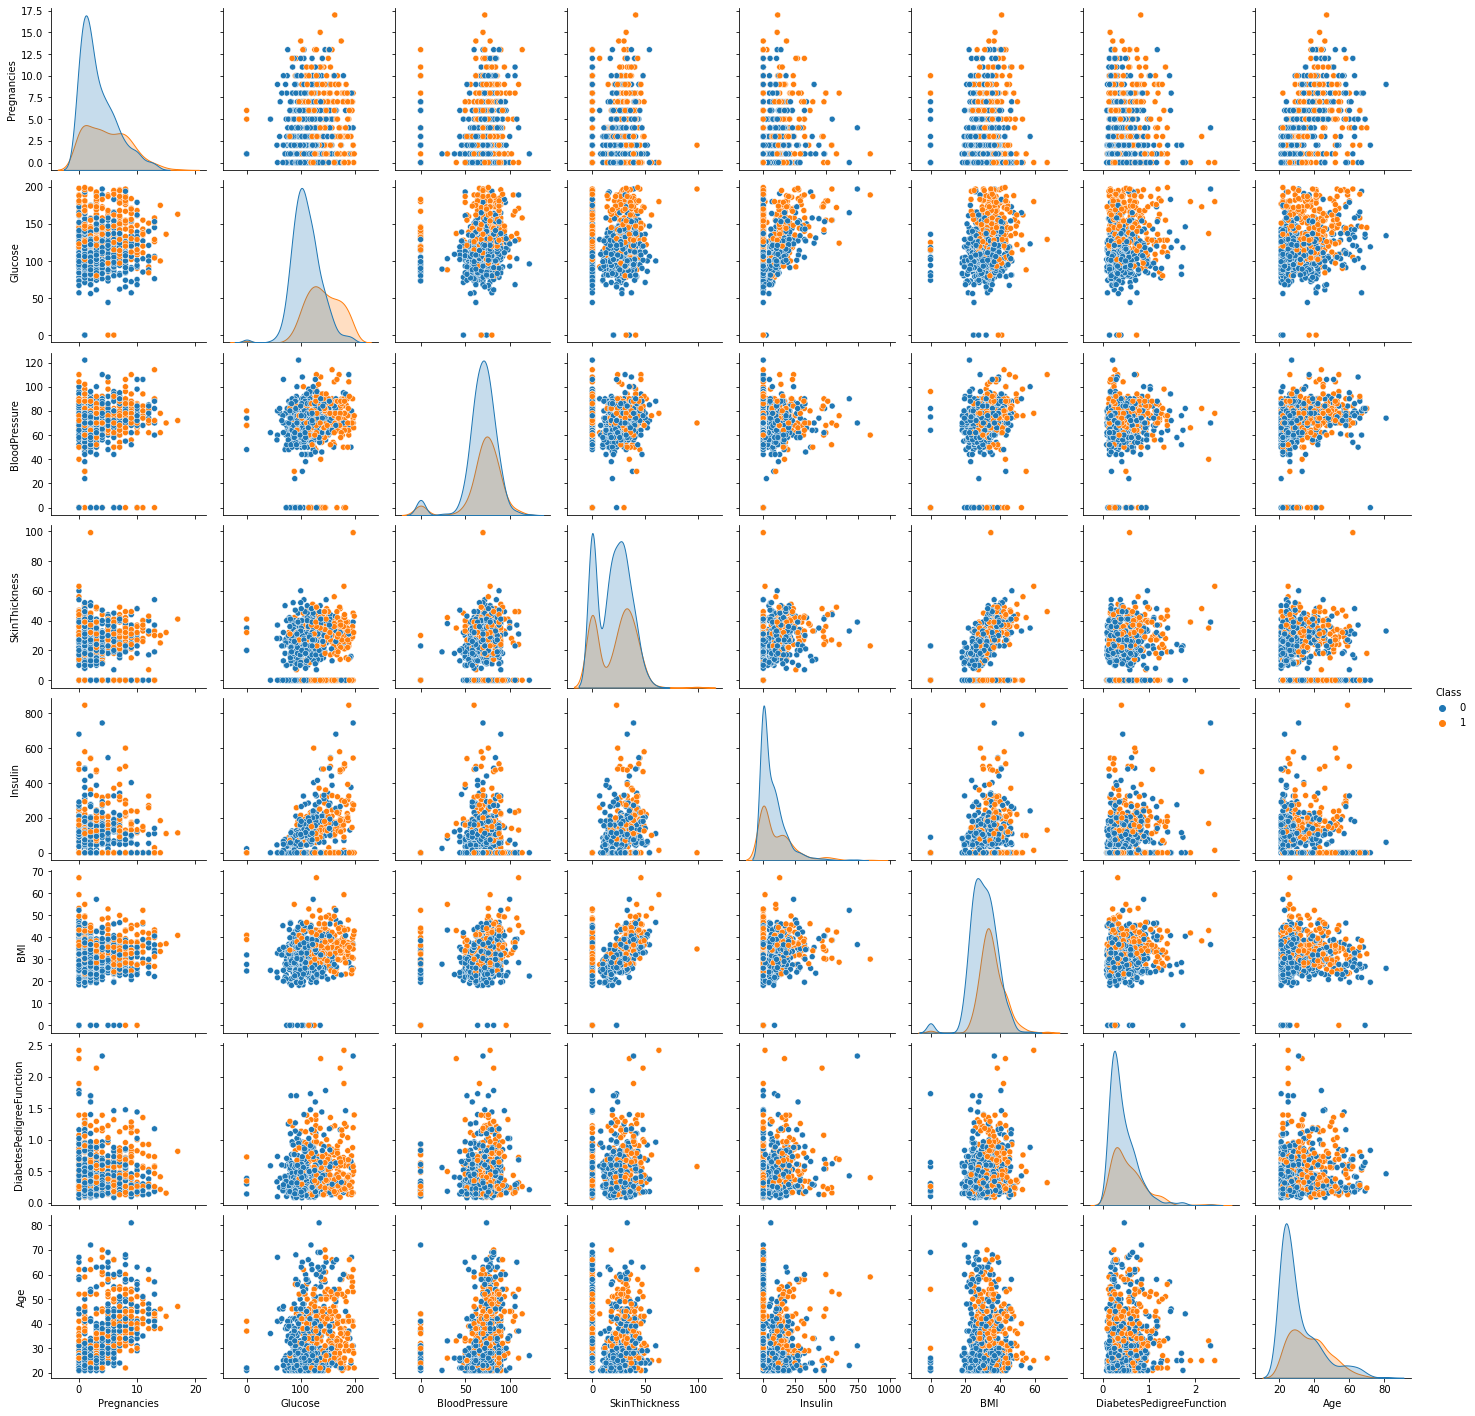

In [16]:
sns.pairplot(df,hue='Class')

In [17]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

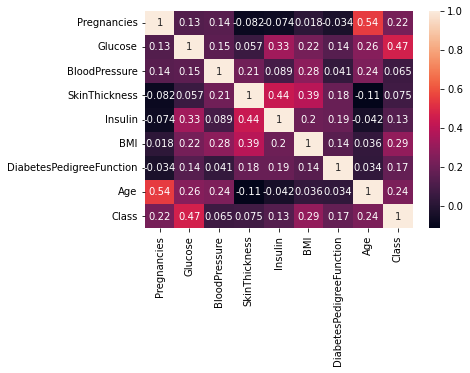

In [18]:
sns.heatmap(df.corr(),annot=True)

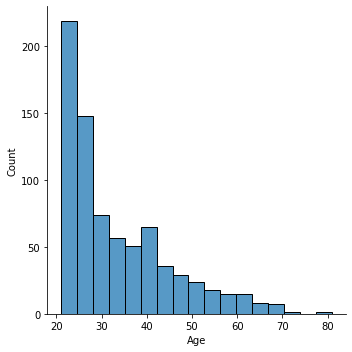

In [19]:
sns.displot(df.Age)

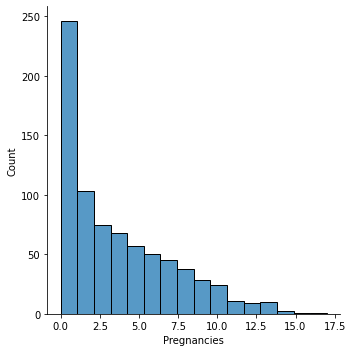

In [20]:
sns.displot(df.Pregnancies)

sns.displot(df.BMI)

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

In [22]:
df.Age.skew()

1.1295967011444805

In [23]:
df.Pregnancies.skew()

0.9016739791518588

In [24]:
df.Glucose.skew()

0.17375350179188992

In [25]:
df.BMI.skew()

-0.42898158845356543

In [26]:
X= df.iloc[:,0:8]
y=df.iloc[:,8]

# train test split

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

In [29]:
y_train

711    0
58     0
216    1
168    0
658    0
      ..
75     0
599    0
575    0
337    1
523    1
Name: Class, Length: 537, dtype: int64

# creating pipelines

1- **Data preprocessing using standard scaler**

2- **reducing Dimensionality using PCA**

3- **Training respective models**

In [30]:
# logistic regression pipeline

lr_pipeline = Pipeline([('scale',StandardScaler()),
               ('pca',PCA(n_components =.95)),
               ('lr',LogisticRegression())])


# K-NN classifier pipeline

Knn_pipeline = Pipeline([('scale',StandardScaler()),
               ('pca',PCA(n_components =.95)),
               ('knn',KNeighborsClassifier())])


# Decision tree classifier pipeline

dtc_pipeline = Pipeline([('scale',StandardScaler()),
               ('pca',PCA(n_components =.95)),
               ('DTC',DecisionTreeClassifier())])



# Random forest tree classifier pipeline

rfc_pipeline = Pipeline([('scale',StandardScaler()),
               ('pca',PCA(n_components =.95)),
               ('rfc',RandomForestClassifier())])

In [31]:
# Gradient boosting classifier pipeline

gbc_pipeline = Pipeline([('scale',StandardScaler()),
               ('pca',PCA(n_components =.95)),
               ('gbc',GradientBoostingClassifier())])


# XG boost classifier pipeline

xgb_pipeline = Pipeline([('scale',StandardScaler()),
               ('pca',PCA(n_components =.95)),
               ('xgb',XGBClassifier())])




from sklearn.svm  import SVC

#SVM classifier pipeline

svm_pipeline = Pipeline([('scale',StandardScaler()),
               ('pca',PCA(n_components =.95)),
               ('svm',SVC())])

# modelling and evaluation

In [32]:
# defining the pipelines in a list

mypipeline = [lr_pipeline,Knn_pipeline,dtc_pipeline,
              rfc_pipeline,gbc_pipeline, xgb_pipeline,svm_pipeline]

In [33]:
# fit the pipelines

for mypipe in mypipeline:
    mypipe.fit(x_train,y_train)

In [34]:
# defining variable for choosing best model

accuracy = 0.0
classifier = 0
pipeline = ''
test_prediction = ''

In [35]:
# creating disctory of pipeline and training models

PipelineDict = {0:'Logistic regression',1:'KNN classifier',2:'Decision tree',
               3:'random forest',4:'gradient boost',5:'xgboost',6:'svm'}

In [36]:
# test prediction

for i , model in enumerate(mypipeline):
        ('{} test prediction: {}'.format(PipelineDict[i],model.predict(x_test)))

In [37]:
# test prediction

for i , model in enumerate(mypipeline):
       ('{} train prediction: {}'.format(PipelineDict[i],model.predict(x_train)))

## test accuracy

In [38]:
# getting test accuracy for all classifier

for i , model in enumerate(mypipeline):
    print('{} train accuracy: {}'.format(PipelineDict[i],
                                         model.score(x_train,y_train)))
    print('{} test accuracy: {}'.format(PipelineDict[i],
                                        model.score(x_test,y_test)))
    print('*'*50)

Logistic regression train accuracy: 0.7802607076350093
Logistic regression test accuracy: 0.7878787878787878
**************************************************
KNN classifier train accuracy: 0.813780260707635
KNN classifier test accuracy: 0.7619047619047619
**************************************************
Decision tree train accuracy: 1.0
Decision tree test accuracy: 0.7445887445887446
**************************************************
random forest train accuracy: 1.0
random forest test accuracy: 0.7705627705627706
**************************************************
gradient boost train accuracy: 0.9404096834264432
gradient boost test accuracy: 0.7792207792207793
**************************************************
xgboost train accuracy: 1.0
xgboost test accuracy: 0.7489177489177489
**************************************************
svm train accuracy: 0.8249534450651769
svm test accuracy: 0.7835497835497836
**************************************************


## best model for accuracy wise

In [39]:
# choosing best model for given data

for j , model in enumerate(mypipeline):
    if model.score(x_test,y_test)> accuracy:
        accuracy = model.score(x_test,y_test)
        pipeline = model
        classifier = j
print('classifier with best accuracy: {}'.format(PipelineDict[classifier]))

classifier with best accuracy: Logistic regression


## confusion matrics

In [40]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score


Logistic regression
KNN classifier
Decision tree
random forest
gradient boost
xgboost
svm


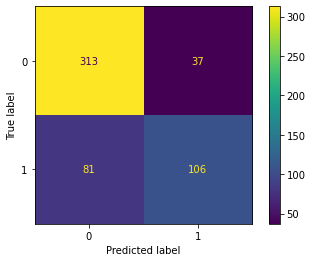

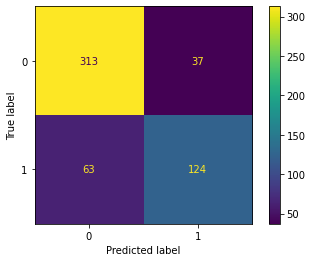

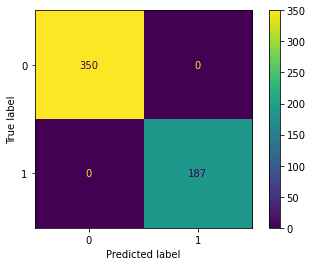

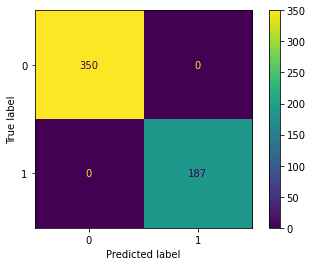

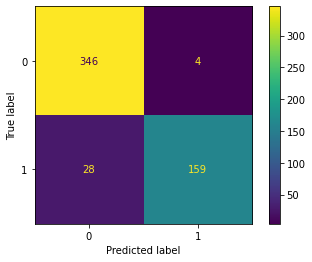

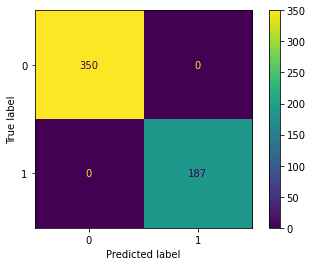

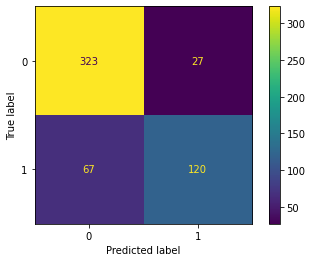

In [41]:
for j,model in enumerate(mypipeline):
        print('{}'.format(PipelineDict[j],
                          plot_confusion_matrix(model,x_train,y_train)))
plt.show()

In [42]:
model=LogisticRegression()
cv= cross_val_score(model,X,y,cv=5)

print(cv)
cv.mean()

[0.77272727 0.74675325 0.75974026 0.81699346 0.74509804]


0.7682624564977505

In [43]:
def find_best_model(X,y):
    models = {'lr':{'model':LogisticRegression(),
              'param_grid':{'penalty':['l2','l1']}},
              
              'xgb':{'model':XGBClassifier(),
                     'param_grid':{'n_estimators': [1,5,8,10,15,40,100],
                                      'max_depth':[3,4,5],
                                     'gamma':[0,0.1,0.2,.3,1,2,3] }},
              
               'gbc':{'model':GradientBoostingClassifier(),
                     'param_grid':{'n_estimators': list(range(1,50)),
                         'learning_rate':[.1,.2,.3,.4,.5,.8,1]}},
              
              'svc':{'model':SVC(),
                    'param_grid':{'C':[0.1,0.2,1.0,2.0,3.0,4.0],
                         'kernel':['rbf','sigmoid','poly','linear']}},
              
              'dtc':{'model':DecisionTreeClassifier(),
                     'param_grid':{'criterion':["gini", "entropy"],
                       'max_depth':[1,2,3,4,5,6] }},
              
              'rfc':{'model':RandomForestClassifier(random_state=1),
                     'param_grid':{'n_estimators':list(range(1,50)),
                                  'criterion':["gini", "entropy"]}},
               
              'knn':{'model':KNeighborsClassifier(algorithm='auto'),
                     'param_grid':{'n_neighbors':list(range(1,50)),
                                  'p':[1,2]}}}
            
    scores = []
    for model_name,model_params in models.items():
            gs= GridSearchCV(model_params['model'],
                             model_params['param_grid'],
                             cv=5,return_train_score = False)
            gs.fit(X,y)
            scores.append({'model':model_name,
                          'best_parameters':gs.best_params_,
                          'score':gs.best_score_})
    return pd.DataFrame(scores,columns=['model','best_parameters','score'])

In [44]:
find_best_model(X,y)  

,model,best_parameters,score
0,lr,{'penalty': 'l2'},0.768262
1,xgb,"{'gamma': 1, 'max_depth': 4, 'n_estimators': 5}",0.773525
2,gbc,"{'learning_rate': 0.1, 'n_estimators': 32}",0.777387
3,svc,"{'C': 3.0, 'kernel': 'linear'}",0.772184
4,dtc,"{'criterion': 'gini', 'max_depth': 5}",0.751388
5,rfc,"{'criterion': 'gini', 'n_estimators': 33}",0.770868
6,knn,"{'n_neighbors': 14, 'p': 1}",0.766930


In [45]:
model=LogisticRegression()
model.fit(x_train,y_train)
test_prediction=model.predict(x_test)
train_prediction=model.predict(x_train)

print('*'*50)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_prediction))
print('*'*50)
print(accuracy_score(y_test,test_prediction))

print('*'*50)
cv= cross_val_score(model,X,y,cv=5)

print(cv)
cv.mean()

**************************************************
0.7746741154562383
**************************************************
0.7922077922077922
**************************************************
[0.77272727 0.74675325 0.75974026 0.81699346 0.74509804]


0.7682624564977505